<a href="https://colab.research.google.com/github/Mere0505/Ejercicios/blob/main/Exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El problema que se presenta se refiere a la prospección sísmica, un método tulizado para estudiar las estructuras de la Tierra y las rocas mediante la propogación de ondas sísmicas. La información que nos da el ejercicio, son a partir de las ondas que puede ayudar a determinar las propiedades del subsuelo, como las velocidades de las ondas y las interfaces entre diferentes capas de la Tierra. Para resolver este ejercicio, es necesario los conceptos de **minimización por diferenciación**.

Aquí explicare un poco los pasos a pasos para llegar a su solución:

**Configuración del problema:** Imagiinemos una capa de suelo superior con espesor uniforme $d_1$, donde la velocidad de las ondas sísmicas es constante y denotada como $v_1$. Esta capa se encuentra sobre otra capa de suelo con una velcoidad de onda constante $v_2$. Se utiliza un dispositivo para producir una onda sísmica en un punto $P$ y un receptor para medir el tiempo que tarda la onda en viajar desde la fuente a diferentes puntos en la superficie de la Tierra.

**Dos tipos de ondas:** Se consideran dos tipos de ondas, una onda superficial que viaja directamente desde la fuente al receptor a lo largo de la superficie de la Tierra $t_1$, y una onda que viaja dentro de la Tierra, go,pea la interfaz entre los dos medios, y luego viaja en el medio inferior antes de regresar a través de la capa superior al receptor $t_2$.

**Minización de tiempo**
Se busca minimizar el tiempo que tarda la onda $t_2$. Esto se hace variando el ángulo $\theta_1$, que forma la trayectoria de la onda en el medio superior al receptor $t_2$.

**Derivación de $\theta_1$ óptimo:** Se calcula la derivada de $t_2$ con respecto a $\theta_1$ y se establece igual a cero para encontrar el valor óptimo de $\theta_1$. ESto da como resultado $sen\theta= \frac{v_1}{v_2}$

**Parámetro k:** Se introduce el parámetro $k=\frac{v_1}{v_2}$ para simplificar la expresión.

**Expresión final del tiempo $t_2$** Se llega a la expresión final apra el tiempo total $t_2$ en términos de $k, d_1, v_1 , v_2 y s$ donde $s$ es la distancia entre la fuente y el receptor.

**Relación entre $t_1$ y $t_2$:** Se divide la expresión de $t_2$ por $t_1$ y se ontiene una relacion entre: $\frac{t_1}{t_2}$ y $\frac{1}{s}$.

**Gráfica entre $\frac{t_2}{t_1}$ contra $\frac{1}{s}$:** se traza $\frac{v_1}{v_2}$ en funcion $\frac{1}{s}$ en un gráfico de coordendas cartesianas, los resultados deberían formar una línea recta. La pendiente de esta línea $(m)$ permite determinar $d_1$ y, por lo tanto, $v_2$.

**Verificación de la validez del supuesto:** la linealidad de la gráfica es una verificación parcial de la validez del supuesto. Si los puntos experimentales no se ajustan a una línea recta, podria haber variaciones en la capa superior que afectan la velodicad de las ondas sísmicas.

**Aplicaciones adicionales:**
El mismo enfoque se puede utilizar para abordar problemas más complejos, como estructuras geológicas tridimensionales o medio de múltiples capas.


Despues de una breve explicación del ejercicio, podemos escribirlo en un programa de optimización, entonces:

**1.** Definir una función objetivo que mida la discrepancia entre los datos experimentales y los valores predichos por el modelo.

**2.** Especificar las condiciones iniciales para la optimización, es decir, los valores iniciales de $v_2$ y $d_1$.

**3.** Definir la función objetivo aqui tomamos dos parámetros como $v_2$ y $d_1$, que son la velocidad de la onda y el espesor de la capa inferior respectivamente.

**4.** Optimización por diferenciación, para encontrar los valores optimos de $v_2$ y $d_1$

Una parte del código es importante que lo explique:
Es el metodo que se usa "BFGS".

Es un algoritmo de optimización no lineal que se utiliza para encontrar mínimos de funciones objetivas en el campo de la optimización matemática.
**Inventores: Broyden, Fletcher, Goldfarb y Shanno.**


El método BFGS pertenece a la familia de métodos Cuasi-Newtonianos, que son técnicas utilizadas para la optimización de funciones sin tener que calcular explícitamente la matriz Hessiana.

**Características clave del método:**

**Cuasi-Newtoniano:** El método BFGS s una aproximación a los metodos Newtonianos, que requiere el cálculo de la matrix Hessiana. El término "cuasi" significa que no se calcula la matriz Hessiana completa, sino que se estima a lo largo de las iteraciones.

**Actualización de matrix Hessina:** En cada iteración, el método BFGS actualiza una aproximación de la matriz hessiana inversa.

**Direccion de búsqueda** utiliza la matriz hessina inversa aproximada para determinar la dirección de búsqueda en la que se mueve para minizar la función objetivo.

**Convergencia:** El método BFGS es conocido por su buena convergencia, especialmente en problemas de optimización no lineales suaves.


**No requiere de segundas derivadas** A diferencia de los métodos Newtonianos, el metodo BFGS no necesita calcular las segundas derivas de la función objetivo.

Velocidad v2 óptima: 2.0000
Espesor d1 óptimo: 0.8109


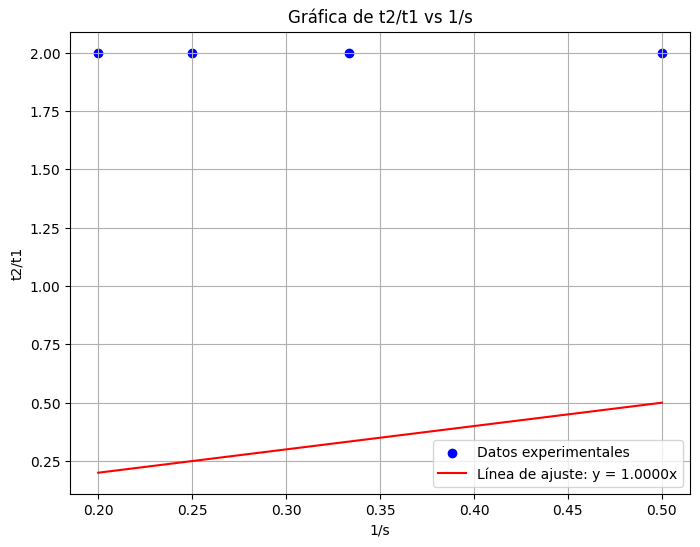

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
#Importamos las biblotecas
#numpy se usa para realizar cálculos numéricos
#scipy.optimize.minimize permite realizar la optimización numérica
# matplotlib.pyplot Nos permite realizar gráficos

# Datos experimentales t1, t2 y s para varios puntos
t1 = [1.0, 1.5, 2.0, 2.5]
t2 = [2.0, 3.0, 4.0, 5.0]
s = [2.0, 3.0, 4.0, 5.0]

# Función objetivo a minimizar
#objective_function(params) esta función calcula el error entre los valores
#experimentales y los valores predichos de t_1 y t_2 para un conjunto dado de
#parámetros v_2 y d_1
# v_2 velocidad de la onda en el segundo medio
# d_1 espesor de la capa de suelo
def objective_function(params):
    v2, d1 = params
    t1_predicted = [s_i / v2 for s_i in s]
    t2_predicted = []
    for t1_i, s_i in zip(t1, s):
        argument = t1_i / (2 * d1 / v2)
        if 0 < argument < 1:
            t2_i = (2 * d1 / v2) * np.sqrt(1 - argument**2) + s_i / v2
            t2_predicted.append(t2_i)
        else:
            t2_predicted.append(np.nan)  # Valor no válido
    error = np.nansum((np.array(t1) - t1_predicted)**2) + np.nansum((np.array(t2) - t2_predicted)**2)
    return error

# Condiciones iniciales para la optimización
initial_guess = [1.0, 1.0]  # Valores iniciales de v2 y d1
# Esto es una suposición inicial para los valores óptimos de v_2 y d_1


# Minimización por diferenciación
result = minimize(objective_function, initial_guess, method='BFGS')
#Aquí utiliza el método de minimización BFGS para encontrar los valores óptimos de
#v_2 y d_1 que minimizan la función objetivo.

# Obtén los valores óptimos de v2 y d1
v2_optimal, d1_optimal = result.x

# Imprime los resultados
print(f"Velocidad v2 óptima: {v2_optimal:.4f}")
print(f"Espesor d1 óptimo: {d1_optimal:.4f}")

# Gráfica de t2/t1 vs 1/s
t2_t1 = np.array(t2) / np.array(t1)
inv_s = 1 / np.array(s)

plt.figure(figsize=(8, 6))
plt.scatter(inv_s, t2_t1, label='Datos experimentales', marker='o', color='blue')
plt.xlabel('1/s')
plt.ylabel('t2/t1')

# Ajusta una línea recta a los datos
m = v2_optimal / v2_optimal  # Pendiente m
plt.plot(inv_s, m * inv_s, color='red', label=f'Línea de ajuste: y = {m:.4f}x')

plt.legend()
plt.title('Gráfica de t2/t1 vs 1/s')
plt.grid(True)

# Muestra la gráfica
plt.show()
